## 1. Implement Decision tree using CART algorithm.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [2]:
# 1. Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [3]:
# 3. Train Decision Tree using CART algorithm (Gini Index)
model_cart = DecisionTreeClassifier(criterion="gini", random_state=42)
model_cart.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [4]:
# 4. Predict
y_pred_cart = model_cart.predict(X_test)

# 5. Evaluate
print(f"Accuracy: {accuracy_score(y_test, y_pred_cart)*100:.2f}%\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_cart, target_names=iris.target_names))

Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



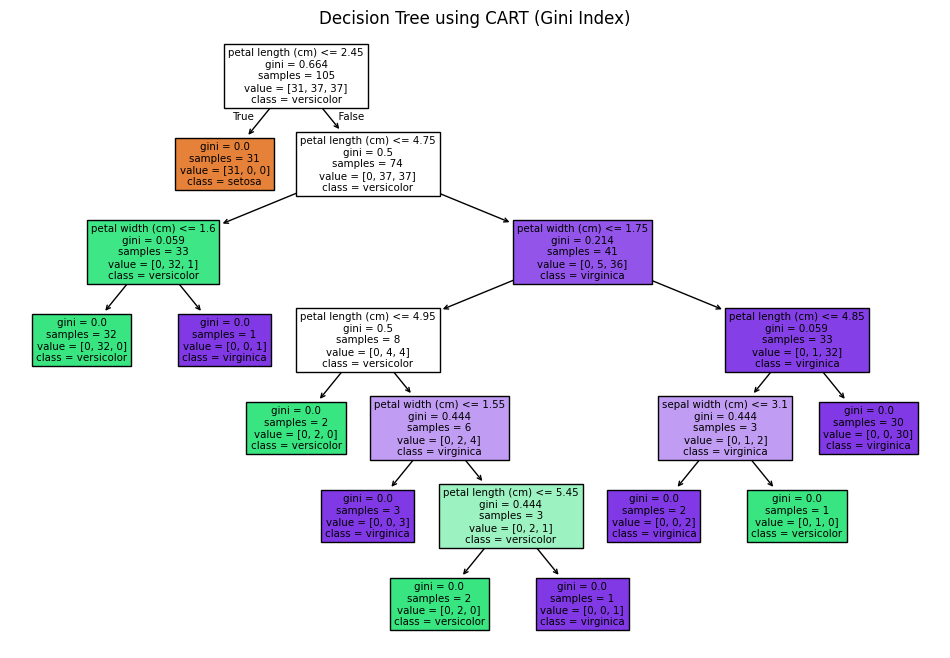

In [5]:
# 6. Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model_cart, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree using CART (Gini Index)")
plt.show()


## 2. Implement rule-based classification using OneR algorithm.

In [6]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [7]:
# 1. Load dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Discretize continuous features for simplicity (OneR works on categorical features)
df_discrete = df.copy()
for col in iris.feature_names:
    df_discrete[col] = pd.cut(df[col], bins=5, labels=False)

# Split into train and test sets
train_df, test_df = train_test_split(df_discrete, test_size=0.3, random_state=42)

In [8]:
# 2. Implement OneR algorithm
def one_r(train_df, target_col):
    best_feature = None
    best_accuracy = 0
    best_rules = None

    for feature in train_df.columns:
        if feature == target_col:
            continue

        # Create rules for this feature
        rules = train_df.groupby(feature)[target_col].agg(lambda x: x.value_counts().index[0]).to_dict()

        # Predict based on rules
        predictions = train_df[feature].map(rules)

        # Calculate accuracy
        acc = accuracy_score(train_df[target_col], predictions)
        if acc > best_accuracy:
            best_accuracy = acc
            best_feature = feature
            best_rules = rules

    return best_feature, best_rules, best_accuracy

In [9]:
# Train OneR model
best_feature, best_rules, train_acc = one_r(train_df, 'target')
print(f"Best Feature: {best_feature}")
print(f"Rules: {best_rules}")
print(f"Training Accuracy: {train_acc*100:.2f}%")

Best Feature: petal width (cm)
Rules: {0: 0, 1: 1, 2: 1, 3: 2, 4: 2}
Training Accuracy: 93.33%


In [10]:
# 3. Test phase
test_predictions = test_df[best_feature].map(best_rules)

# Handle unseen feature values
test_predictions = test_predictions.fillna(test_df['target'].mode()[0])

test_accuracy = accuracy_score(test_df['target'], test_predictions)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Test Accuracy: 95.56%
